# Instalation

# Code

In [1]:
import math
import numpy as np
import pandas as pd
import bagpipes as pipes
from astropy.table import Table
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.labelsize']= 22
mpl.rcParams['legend.fontsize']= 15
mpl.rcParams['xtick.major.size']= 16
mpl.rcParams['xtick.minor.size']= 8
mpl.rcParams['ytick.major.size']= 16
mpl.rcParams['ytick.minor.size']= 8
mpl.rcParams['xtick.labelsize']= 16
mpl.rcParams['ytick.labelsize']= 16


In [2]:
filter_list_splus = ['filters/uJAVA.dat',
                     'filters/F0378.dat',
                     'filters/F0395.dat',
                     'filters/F0410.dat',
                     'filters/F0430.dat',
                     'filters/gSDSS.dat',
                     'filters/F0515.dat',
                     'filters/rSDSS.dat',
                     'filters/F0660.dat',
                     'filters/iSDSS.dat',
                     'filters/F0861.dat',
                     'filters/zSDSS.dat']


mags = ["u_aper_3", "J0378_aper_3", "J0395_aper_3", "J0410_aper_3", "J0430_aper_3", "g_aper_3", "J0515_aper_3", "r_aper_3",
        "J0660_aper_3", "i_aper_3", "J0861_aper_3", "z_aper_3"]
mags_err = ["e_u_aper_3", "e_J0378_aper_3", "e_J0395_aper_3", "e_J0410_aper_3", "e_J0430_aper_3", "e_g_aper_3",
            "e_J0515_aper_3","e_r_aper_3", "e_J0660_aper_3","e_i_aper_3", "e_J0861_aper_3", "e_z_aper_3"]

# Load data function

In [3]:
def load_data_splus(id):
        print(id)
        # try:
        #     object, field = id.split('_')
        # except:
        #     object1, object2, field = id.split('_')
        #     object = object1 + '_' + object2

        fluxes = []
        fluxerrs = []
        galaxy_param = df[(df['ID'] == id)]
        #print(galaxy_param[mags])
        #print(galaxy_param[mags_err])

        for k in range(0, len(mags)):
            m = galaxy_param[mags[k]]
            if (math.isnan(m.values)) | (m.values == np.inf) | (m.values == 99.) | (m.values == -99.):
                f = np.array([99.])
                delta_f = np.array([99.])
            else:
                f = 10**(9.56) * 10**(-m/2.5)  # flux in mJy
                delta_m = galaxy_param[mags_err[k]]
                delta_f = f * (1/2.5) * np.log(10) * delta_m

            #print(m, delta_m, f, delta_f)

            fluxes.append(f)  #mJy
            fluxerrs.append(delta_f)  #mJy
        photometry = np.c_[fluxes, fluxerrs]

        print(photometry)
        return photometry

# Double power law fitting

In [4]:
dblplaw = {}                         # double-power-law
dblplaw["tau"] = (0., 15.) # Vary the time of peak star-formation between the Big Bang at 0 Gyr and 15 Gyr later.
                           # In practice the code automatically stops this exceeding the age of the universe at the
                           # observed redshift.
dblplaw["alpha"] = (0.01, 1000.)          # Vary the falling power law slope from 0.01 to 1000.
dblplaw["beta"] = (0.01, 1000.)           # Vary the rising power law slope from 0.01 to 1000.
dblplaw["alpha_prior"] = "log_10"         # Impose a prior which is uniform in log_10 of the 
dblplaw["beta_prior"] = "log_10"          # parameter between the limits which have been set above as 
                                          # in Carnall et al. (2017).
dblplaw["massformed"] = (4., 13.) # total stellar mass formed during this period of time
dblplaw["metallicity"] = (0., 2.5) # Z/Z_solar = 0.02


# delayed = {}
# delayed["age"] = (0.001, 13.) # Time since SF began: Gyr
# delayed["tau"] = (0.001, 13.) # timescale of the decaying
# delayed["massformed"] = (6., 13.) # total stellar mass formed during this period of time
# delayed["metallicity"] = (0., 1.) # Z/Z_solar = 0.02

# burst = {}
# burst["age"] = (0.001, 13.)
# burst["massformed"] = (6.,13.)
# burst["metallicity"] = (0,1.)

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0., 4.)
dust["eta"] = 3. #factor of birth clouds

nebular = {}
nebular["logU"] = (-4,-2)

model_components = {}

#model_components["redshift"] = mandatory  # Observed redshift
model_components["t_bc"] = 0.01           # Max age of birth clouds: Gyr
#model_components["veldisp"] = 0.          # Velocity dispersion: km/s

#model_components["stellar_mass"] = (6.,13.)
model_components["dust"] = dust
model_components["nebular"] = nebular
model_components["dblplaw"] = dblplaw
#model_components["delayed"] = delayed
#model_components["burst"] = burst

df = pd.read_csv('galaxies_aper3_idr4.csv')

IDs = df['ID']
redshifts = df['zml']
fit_cat = pipes.fit_catalogue(IDs, model_components, load_data_splus, spectrum_exists=False,
                              cat_filt_list=filter_list_splus, run="galaxies_aper3_idr4_dblplaw", make_plots=True,
                              full_catalogue=True, redshifts=redshifts)

fit_cat.fit(verbose=False)

# Delayed fitting

In [5]:
# dblplaw = {}                         # double-power-law
# dblplaw["tau"] = (0., 15.) # Vary the time of peak star-formation between the Big Bang at 0 Gyr and 15 Gyr later.
#                            # In practice the code automatically stops this exceeding the age of the universe at the
#                            # observed redshift.
# dblplaw["alpha"] = (0.01, 1000.)          # Vary the falling power law slope from 0.01 to 1000.
# dblplaw["beta"] = (0.01, 1000.)           # Vary the rising power law slope from 0.01 to 1000.
# dblplaw["alpha_prior"] = "log_10"         # Impose a prior which is uniform in log_10 of the 
# dblplaw["beta_prior"] = "log_10"          # parameter between the limits which have been set above as 
#                                           # in Carnall et al. (2017).
# dblplaw["massformed"] = (4., 13.) # total stellar mass formed during this period of time
# dblplaw["metallicity"] = (0., 2.5) # Z/Z_solar = 0.02


delayed = {}
delayed["age"] = (0.001, 13.) # Time since SF began: Gyr
delayed["tau"] = (0.001, 13.) # timescale of the decaying
delayed["massformed"] = (6., 13.) # total stellar mass formed during this period of time
delayed["metallicity"] = (0., 1.) # Z/Z_solar = 0.02

# burst = {}
# burst["age"] = (0.001, 13.)
# burst["massformed"] = (6.,13.)
# burst["metallicity"] = (0,1.)

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0., 4.)
dust["eta"] = 3. #factor of birth clouds

nebular = {}
nebular["logU"] = (-4,-2)

model_components = {}

#model_components["redshift"] = mandatory  # Observed redshift
model_components["t_bc"] = 0.01           # Max age of birth clouds: Gyr
#model_components["veldisp"] = 0.          # Velocity dispersion: km/s

#model_components["stellar_mass"] = (6.,13.)
model_components["dust"] = dust
model_components["nebular"] = nebular
#model_components["dblplaw"] = dblplaw
model_components["delayed"] = delayed
#model_components["burst"] = burst

df = pd.read_csv('galaxies_aper3_idr4.csv')

IDs = df['ID']
redshifts = df['zml']
fit_cat = pipes.fit_catalogue(IDs, model_components, load_data_splus, spectrum_exists=False,
                              cat_filt_list=filter_list_splus, run="galaxies_aper3_idr4_delayed", make_plots=True,
                              full_catalogue=True, redshifts=redshifts)

fit_cat.fit(verbose=False)

iDR4_3_STRIPE82-0116_0005442
[[ 19.78907981   1.73345392]
 [ 39.99108618   3.2255638 ]
 [ 50.85592992   7.18908325]
 [ 66.76579121   5.02830524]
 [ 94.49125126   4.92331618]
 [154.328452     1.97778308]
 [218.68711739   4.72806608]
 [395.70250538   2.84300783]
 [448.9785572    3.48879153]
 [680.22407697   3.96076003]
 [859.62136323   7.79564119]
 [960.98011243   6.19505137]]

Bagpipes: fitting object iDR4_3_STRIPE82-0116_0005442

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    6
 resuming from previous job
 *****************************************************
 ln(ev)=   431.13325372740627      +/-  0.19208366781369507     
 Total Likelihood Evaluations:        38933
 Sampling finished. Exiting MultiNest

Completed in 161.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
-----------

Bagpipes: 4 out of 10 objects completed.
iDR4_3_STRIPE82-0074_0009433
[[1.95348104e+01 7.40954688e-01]
 [3.47336481e+01 1.31607793e+00]
 [3.37309055e+01 1.99918464e+00]
 [6.13417272e+01 1.88241652e+00]
 [8.59630864e+01 1.84236496e+00]
 [1.40932125e+02 8.19333996e-01]
 [1.94812132e+02 2.01839022e+00]
 [3.52632552e+02 1.17061084e+00]
 [4.05940143e+02 1.49026156e+00]
 [5.76764870e+02 1.62178966e+00]
 [6.91724567e+02 3.37856555e+00]
 [7.70217887e+02 2.47478156e+00]]

Bagpipes: fitting object iDR4_3_STRIPE82-0074_0009433

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    6
 *****************************************************

Completed in 309.6 seconds.
 ln(ev)=   389.16567582290935      +/-  0.20570572322172229     
 Total Likelihood Evaluations:        56823
 Sampling finished. Exiting MultiNest

Pa

/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/edrok/.local/lib/python3.8/site-packages/bagpipes/plotting/plot_1d_posterior.py:55: RuntimeWarning: divide by zero encountered in log10
  samples = np.log10(samples)


Bagpipes: 5 out of 10 objects completed.
iDR4_3_STRIPE82-0072_0024325
[[134.41074863   2.51689011]
 [215.03878621   4.41838871]
 [226.83329425   6.30975155]
 [260.38598195   5.72401276]
 [298.66257145   5.63908727]
 [334.57847706   2.59959732]
 [410.93695639   5.55266982]
 [590.04345859   3.09844737]
 [540.06545655   3.55738541]
 [716.64355586   3.60790943]
 [791.87238854   6.95430037]
 [887.89579661   5.21790135]]

Bagpipes: fitting object iDR4_3_STRIPE82-0072_0024325

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    6
 *****************************************************

 MultiNest Warning!
 Parameter            4  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            4  of mode            1  is converging towards the edge of the prior.



Bagpipes: 6 out of 10 objects completed.
iDR4_3_STRIPE82-0067_0011186
[[  43.10106486    1.52480147]
 [  62.50333634    2.57098518]
 [  74.17528096    3.78313155]
 [  87.72076289    3.7015769 ]
 [ 142.7728405     4.15037893]
 [ 255.86565842    2.25526616]
 [ 383.99361232    5.24084076]
 [ 655.36553719    3.23827666]
 [ 694.26168816    3.93880458]
 [ 992.53630191    4.33426278]
 [1203.14508153    8.20302162]
 [1290.9005921     6.30011604]]

Bagpipes: fitting object iDR4_3_STRIPE82-0067_0011186

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    6
 *****************************************************

Completed in 239.1 seconds.
 ln(ev)=   412.13374770538098      +/-  0.20191114782981343     
 Total Likelihood Evaluations:        43618
 Sampling finished. Exiting MultiNest

Parameter                 

Bagpipes: 7 out of 10 objects completed.
iDR4_3_STRIPE82-0071_0009531
[[ 39.16560143   1.65700812]
 [ 62.56427265   2.78922666]
 [ 76.11110024   4.15822526]
 [ 96.14103651   4.07265636]
 [ 98.45858727   4.7356741 ]
 [143.40331802   1.86232103]
 [168.70890241   4.05293206]
 [293.28239894   2.40841056]
 [312.64796051   3.53892098]
 [416.75805258   3.01371317]
 [459.45099883   6.04244793]
 [511.5819347    4.54770431]]

Bagpipes: fitting object iDR4_3_STRIPE82-0071_0009531

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    6
 *****************************************************

Completed in 262.5 seconds.
 ln(ev)=   405.15801631019553      +/-  0.20500272024594390     
 Total Likelihood Evaluations:        47190
 Sampling finished. Exiting MultiNest

Parameter                          Posterior perce

Bagpipes: 8 out of 10 objects completed.
iDR4_3_STRIPE82-0071_0037955
[[  64.09521372    2.41271813]
 [ 100.82522504    3.34131891]
 [ 142.69159746    5.14264686]
 [ 175.54885453    4.93556002]
 [ 198.50854219    6.09025437]
 [ 397.01855101    2.8301958 ]
 [ 488.94273781    6.07965812]
 [1005.21185079    4.05657737]
 [1074.33568143    5.88499423]
 [1696.60209913    5.22029074]
 [1988.10629302   10.09909853]
 [2135.72041979    7.2880466 ]]

Bagpipes: fitting object iDR4_3_STRIPE82-0071_0037955

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    6
 *****************************************************

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            3  of mode            1  is converging towards 

/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/edrok/.local/lib/python3.8/site-packages/bagpipes/plotting/plot_1d_posterior.py:55: RuntimeWarning: divide by zero encountered in log10
  samples = np.log10(samples)


Bagpipes: 9 out of 10 objects completed.
iDR4_3_STRIPE82-0061_0019913
[[ 11.39831881   1.26029876]
 [ 19.46082288   2.17093431]
 [ 27.15763831   3.16638524]
 [ 30.43639418   2.84207304]
 [ 31.99534519   2.72369716]
 [ 47.22469916   1.1802117 ]
 [ 55.68866412   2.65181427]
 [ 83.78718506   1.44444113]
 [ 89.3404221    1.75931049]
 [108.48947311   1.91854103]
 [115.34500707   4.0668044 ]
 [127.20963309   3.11947713]]

Bagpipes: fitting object iDR4_3_STRIPE82-0061_0019913

 MultiNest Warning: no resume file found, starting from scratch
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    6
 *****************************************************
 ln(ev)=   455.80553992345438      +/-  0.17732051496656756     

Completed in 175.2 seconds.

 Total Likelihood Evaluations:        31133
 Sampling finished. Exiting MultiNest
Parameter                          Posterior perce

/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass
/home/edrok/.local/lib/python3.8/site-packages/bagpipes/plotting/plot_1d_posterior.py:55: RuntimeWarning: divide by zero encountered in log10
  samples = np.log10(samples)


Bagpipes: 10 out of 10 objects completed.


Loading the results of one galaxy

In [6]:
ID = fit_cat.IDs[0]

galaxy = pipes.galaxy(ID, load_data_splus, spectrum_exists=False,
                      filt_list=filter_list_splus)

fit = pipes.fit(galaxy, model_components, run="galaxies_aper3_idr4_dblplaw")

fit.fit(verbose=False)

iDR4_3_STRIPE82-0073_0011797
[[ 25.0277841    1.48118348]
 [ 38.23184      2.42304364]
 [ 39.49899084   3.49662606]
 [ 49.95709773   3.39422589]
 [ 68.16389519   3.44254928]
 [ 76.69474362   1.47441275]
 [ 96.97879868   3.28847231]
 [142.56036545   1.85219866]
 [153.34245076   2.23940149]
 [198.28341953   2.42466895]
 [229.31686717   5.12941071]
 [247.0977552    3.93795644]]


/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:270: RuntimeWarning: overflow encountered in power
  sfr[mask] = ((t/tau)**alpha + (t/tau)**-beta)**-1



Results loaded from pipes/posterior/galaxies_aper3_idr4_dblplaw/iDR4_3_STRIPE82-0073_0011797.h5

Fitting not performed as results have already been loaded from pipes/posterior/galaxies_aper3_idr4_dblplaw/iDR4_3_STRIPE82-0073_0011797.h5. To start over delete this file or change run.



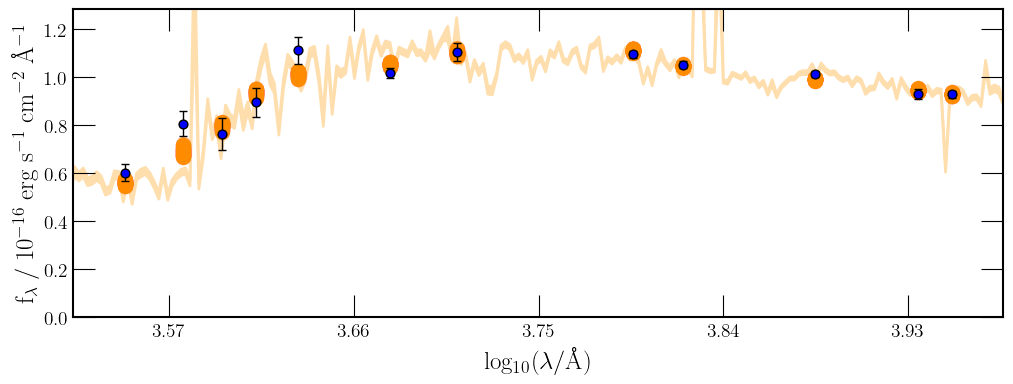

In [7]:
list(fit.posterior.samples)

fig = fit.plot_spectrum_posterior(save=False, show=True)
#fig = fit.plot_sfh_posterior(save=False, show=True)
#fig = fit.plot_corner(save=False, show=True)

In [8]:
Bands=['u','J0378','J0395','J0410','J0430','g','J0515','r','J0660','i','J0861','z'] 
cent_lambd={'u':3536,'J0378':3770,'J0395':3940,'J0410':4094,'J0430':4292, 'g':4751,
            'J0515':5133, 'r':6258, 'J0660':6614,   'i':7690 ,'J0861':8611, 'z':8831}
lamd=[3536,3770,3940,4094,4292,4751,5133,6258,6614,7690,8611,8831]

def flux_2_mJy (mag, mag_err):
    """
    This function convert magnitudes AB to microJy
    """
    fl = 10**9.56*10**(-mag/2.5) 
    fl_e = mag_err*fl/(2.5*np.log10(np.exp(1)))
    return fl, fl_e


def mJy_2_ergs_A(flux, band):
    """
    This fucntion convert flux in microJy to ergs/cm^2/s/A
    """
    fluxout = (flux*1e-6*u.Jy).to(u.erg / u.cm**2 / u.s / u.AA,  equivalencies=u.spectral_density(cent_lambd[band] * u.AA))
    return fluxout

## Reading the S-SPLUS table
tab_samp=Table.read('result.csv') 
tab_samp

fl = []
fl_err = []
ID_num = 0
for band in Bands:
    mag = '{}_aper_3'.format(band)
    mag_e = 'e_{}_aper_3'.format(band)
    
    fl_temp, fl_err_temp = flux_2_mJy(tab_samp[ID_num][mag], 
                                      tab_samp[ID_num][mag_e])
    
    fl.append(fl_temp)
    fl_err.append(fl_err_temp)

fl_ergs_A = []
fl_ergs_A_err = []
ID_num = 0
for i, band in enumerate(Bands):
    
    fl_temp = mJy_2_ergs_A(fl[i], band)
    fl_temp_err = mJy_2_ergs_A(fl_err[i], band)
    
    fl_ergs_A.append(fl_temp.value)
    fl_ergs_A_err.append(fl_temp_err.value)
    
fl_ergs_A = np.array(fl_ergs_A)
fl_ergs_A_err = np.array(fl_ergs_A_err)    

## Loading SDSS spectrum
spec = Table.read('format_spec.csv')

In [9]:
fit.posterior.get_advanced_quantities()
list(fit.posterior.samples)


#fit.posterior.samples['spectrum_full'][0].shape

['dblplaw:alpha',
 'dblplaw:beta',
 'dblplaw:massformed',
 'dblplaw:metallicity',
 'dblplaw:tau',
 'dust:Av',
 'nebular:logU',
 'stellar_mass',
 'formed_mass',
 'sfr',
 'ssfr',
 'nsfr',
 'mass_weighted_age',
 'tform',
 'tquench',
 'sfh',
 'photometry',
 'spectrum_full',
 'uvj',
 'chisq_phot',
 'dust_curve']

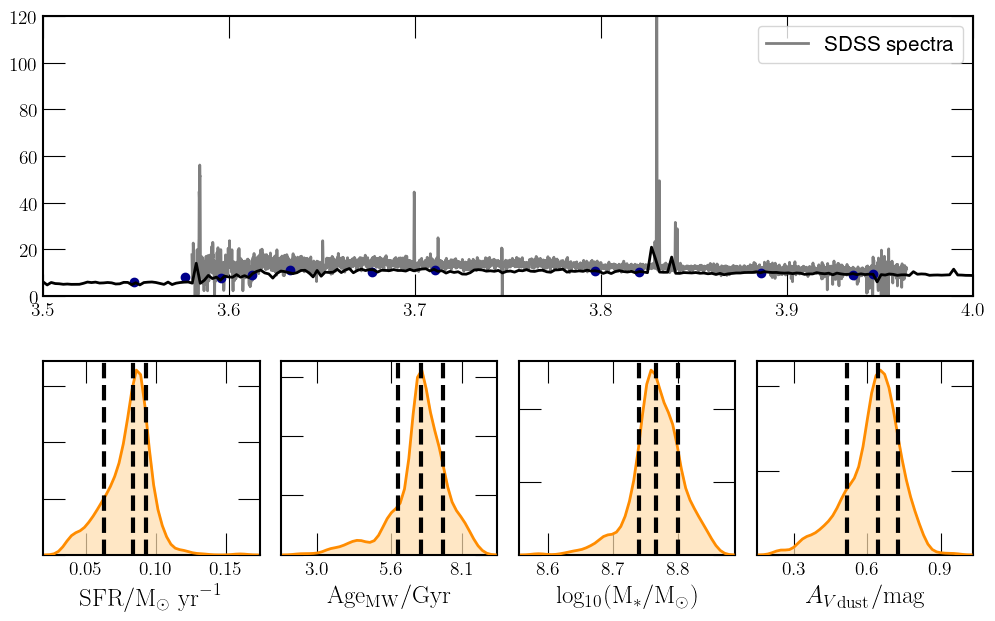

In [10]:
import numpy as np 
import bagpipes as pipes
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from astropy.io import fits

plt.close()

fig = plt.figure(figsize=(12, 7))
gs = mpl.gridspec.GridSpec(7, 4, hspace=3., wspace=0.1)

ax1 = plt.subplot(gs[:4, :])

mask = (fit.galaxy.photometry[:, 1] > 0.)
upper_lims = fit.galaxy.photometry[:, 1] + fit.galaxy.photometry[:, 2]
ymax = 1.05*np.max(upper_lims[mask])
y_scale = int(np.log10(ymax))-2
redshift = fit.fitted_model.model_components["redshift"]
log_wavs = np.log10(fit.posterior.model_galaxy.wavelengths*(1.+redshift))
log_eff_wavs = np.log10(fit.galaxy.filter_set.eff_wavs)
spec_post_median = np.percentile(fit.posterior.samples["spectrum_full"],
                                  (50), axis=0).T*10**-y_scale

#spec_post = np.percentile(fit.posterior.samples["spectrum_full"],
#                                  (16, 84), axis=0).T*10**-y_scale

#spec_post = spec_post.astype(float)  # fixes weird isfinite error

#ax1.plot(log_wavs, spec_post[:, 0], color="navajowhite", zorder=3)

#ax1.plot(log_wavs, spec_post[:, 1], color="navajowhite", zorder=3)

#ax1.fill_between(log_wavs, spec_post[:, 0], spec_post[:, 1], zorder=3, color="navajowhite", linewidth=0)

ax1.plot(log_wavs, spec_post_median, color="black", zorder=4)
#pipes.plotting.add_observed_photometry(fit.galaxy, ax1, zorder=3)
#pipes.plotting.add_photometry_posterior(fit, ax1, zorder=2)

ax1.scatter(np.log10(lamd), fl_ergs_A*1e17, c='darkblue', zorder=3)
ax1.plot(np.log10(spec['Wavelength']), spec['Flux'], zorder=1, color='black', alpha=0.5, label='SDSS spectra')

ax1.set_ylim(0,120)
ax1.set_xlim(3.5,4)
ax1.legend()


labels = ["sfr", "mass_weighted_age", "stellar_mass", "dust:Av"]
post_quantities = dict(zip(labels, [fit.posterior.samples[l] for l in labels]))

axes = []
for i in range(4):
    axes.append(plt.subplot(gs[4:, i]))
    pipes.plotting.hist1d(post_quantities[labels[i]], axes[-1], smooth=True, label=labels[i])

plt.show()